## Necessary Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential # CNN layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # CNN layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # preprocessing
from keras.optimizers import Adam
import seaborn as sns
import cv2
import os

## Train and test datasets
#### Here I will be using FER 2013 dataset which offers grayscale 48*48 images

In [58]:
train_dir = "train" # file paths for test and train datasets
test_dir = "test"

In [5]:
img_size = (48, 48)
batch_size = 64

## Preprocessing image data for the Model

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         # normalisation of pixel values from 0-255 to 0-1
    horizontal_flip=True,   # flip the faces randomly
    rotation_range=10,      
    zoom_range=0.1
)

In [64]:
train_generator = train_datagen.flow_from_directory(
    train_dir,                   # training images folder
    target_size=img_size,        # size would be (48, 48)
    color_mode="grayscale",      # grayscale mode
    batch_size=batch_size,       
    class_mode='categorical'     # one hot encoded format
)

Found 28709 images belonging to 7 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


## Mood classes available in the dataset

In [10]:
num_classes = len(train_generator.class_indices)
print("Moods:", train_generator.class_indices)

Moods: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


## Convolutional Neural Network model implementation
### Using 2 convolution, 2 max pooling and 2 dense layers

In [65]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),  # 25% neurons dropped at this step

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,354,119 (12.79 MB)

 Trainable params: 3,353,735 (12.79 MB)

 Non-trainable params: 384 (1.50 KB)

## Model fitting

In [72]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30
)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.2544 - loss: 1.9155 - val_accuracy: 0.2590 - val_loss: 2.4846
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.3013 - loss: 1.7360 - val_accuracy: 0.3852 - val_loss: 1.5848
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 51s 114ms/step - accuracy: 0.3403 - loss: 1.6649 - val_accuracy: 0.3941 - val_loss: 1.5565
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 68s 151ms/step - accuracy: 0.3615 - loss: 1.6153 - val_accuracy: 0.4292 - val_loss: 1.4880
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 160s 358ms/step - accuracy: 0.3833 - loss: 1.5781 - val_accuracy: 0.4366 - val_loss: 1.4505
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 121s 270ms/step - accuracy: 0.3959 - loss: 1.5418 - val_accuracy: 0.4535 - val_loss: 1.4195
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 129s 287ms/step - accuracy: 0.4122 - loss: 1.5173 - val_accuracy: 0.4237 - val_loss: 1.4777
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 119s 266ms/step - accuracy: 0.4227 - loss: 1.4878 -

## Model accuracy and loss plots

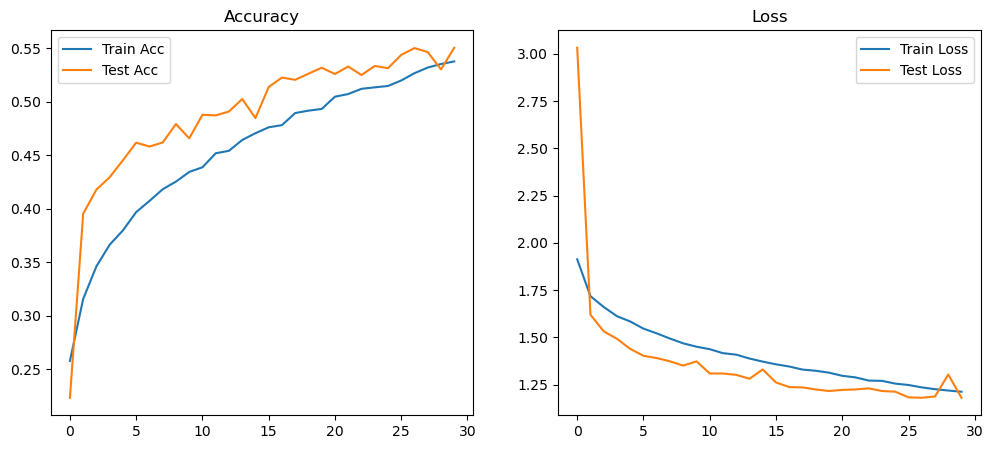

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(); plt.title('Loss')
plt.show()

## Loading images from the dataset
### To change, change the file path to train/mood

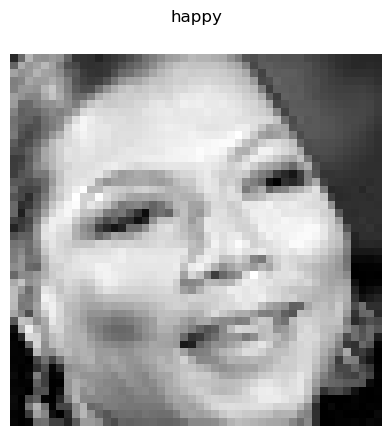

In [60]:
img_path = os.path.join("train/happy", os.listdir("train/happy")[21])

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48,48))

plt.matshow(img, cmap='gray')
plt.title("happy")
plt.axis('off')
plt.show()

## Emotion Labels

In [47]:
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']

## Emotion Prediction

In [48]:
img_input = img.reshape(1,48,48,1) / 255.0

In [56]:
pred = model.predict(img_input)
predicted_emotion = emotion_labels[np.argmax(pred)]
print("Predicted Emotion:", predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Emotion: happy


## Validation accuracy and loss

In [78]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Validation Accuracy: {test_acc*100:.2f}%") # 2 digits precision
print(f"Validation Loss: {test_loss:.4f}") # 4 digits precision

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5545 - loss: 1.1648
Validation Accuracy: 55.45%
Validation Loss: 1.1648


## Confusion matrix

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


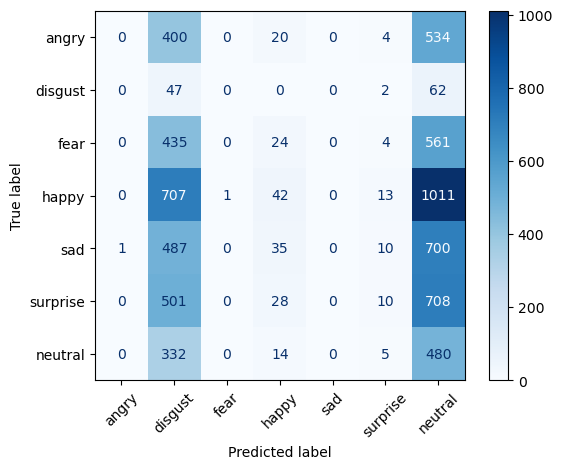

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()

In [55]:
model.save("fer_model.h5")